In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

## Bubble Plot of Ride Sharing Data

In [2]:
# FIRST, obtain x and y coordinates for the bubble plot

###### groups by using city name
city_grouped = ride_data_to_load.groupby(["city"])

###### find x and y axis
city_ride_total = city_grouped["ride_id"].count() ##### X axis
city_fair_average = city_grouped["fare"].mean()   ##### Y axis

###### store the X and Y in a summary DataFrame
city_1_df = pd.DataFrame({"total rides in a city": city_ride_total,
                          "average fare in a city" : city_fair_average})

###### store index as a column
city_1_df["city"] = city_1_df.index

###### and reset index
city_1_df = city_1_df.reset_index(drop=True)

###### merge city_1_df with city data
combined_1_data = pd.merge(city_1_df,city_data_to_load, on='city', how = "right")

###### show the result
combined_1_data.head()

,total rides in a city,average fare in a city,city,driver_count,type
0,18,24.641667,Amandaburgh,12,Urban
1,22,25.332273,Barajasview,26,Urban
2,16,36.422500,Barronchester,11,Suburban
3,18,32.956111,Bethanyland,22,Suburban
4,10,40.064000,Bradshawfurt,7,Rural


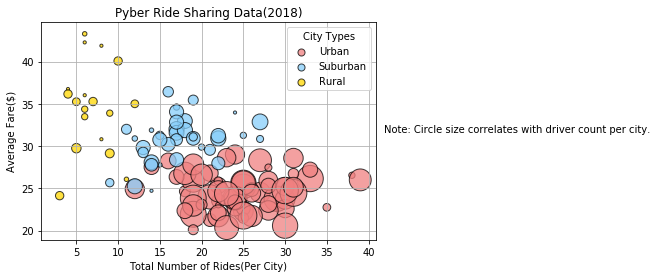

In [37]:
# SECOND, plot by city type 

##### find the groups using city type
city_type = combined_1_data["type"].unique()

##### print the len(city_type) to know how many colors we need
##### set the color 
colors = ["lightcoral","lightskyblue","gold"]

##### plot the scatter draft
for i,c in zip(city_type,colors):
    type1 = combined_1_data.loc[combined_1_data["type"] == i,:]
    
    ##### set marker size
    ##### correlate to the driver count per city
    s = [n*10 for n in type1["driver_count"]]
    
    ##### plot the draft pic with color
    plt.scatter(type1["total rides in a city"], type1["average fare in a city"], linewidths = 1, marker = "o", label = i, facecolor = c, edgecolor = "black", s = s, alpha = 0.75)
    
##### set the legend title, location, and markersize
lgd = plt.legend(loc = "upper right", title = "City Types", markerscale = 0.4, scatterpoints=1, fontsize=10)
for handle in lgd.legendHandles:
    handle.set_sizes([50.0])
    
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2018)")
plt.grid()
note_for_plot = "Note: Circle size correlates with driver count per city."
plt.text(0.92, 0.5, note_for_plot, fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("Pyber_rideVSfare.jpg")

# Show plot
plt.show()

In [34]:
######################################################################################################################################
#
# Figure "Pyber Ride Sharing Data(2018)" shows that the urban cities have the most rides and drivers associating with the lowest averaged fares.
# In contrast, the rural cities generally have the lest rides and drivers but have the highest fares
# The suburban cities, which are in the between of urban cities and rural cities, have the middle size of rides and averaged fares.
#
######################################################################################################################################

## Total Fares by City Type

In [22]:
# First, calculate the percentage

##### merge the City and Ride Data
combined_2_data = pd.merge(ride_data_to_load,city_data_to_load, on='city',how = 'left')

###### obtain the total fare for all the types
total_fare = combined_2_data["fare"].sum()

###### groups by using city type
type_2_grouped = combined_2_data.groupby(["type"])

###### find fare for each type
type_fare_sum = type_2_grouped["fare"].sum()

###### store the sum fare for each type in a DataFrame
fare_sum_df = pd.DataFrame({"fare_sum": type_fare_sum})

###### store the fare percentage for each type in a DataFrame
fare_sum_df["percentage"] = fare_sum_df["fare_sum"]/total_fare

def reorderDF(df):
    df["type"] = df.index
    df = df.reset_index(drop=True)
    df1 = df.sort_values("type",ascending=False)
    df1 = df1.reset_index(drop=True)
    return df1

fare_sum_df = reorderDF(fare_sum_df)
fare_sum_df

,fare_sum,percentage,type
0,39854.38,0.627246,Urban
1,19356.33,0.304639,Suburban
2,4327.93,0.068115,Rural


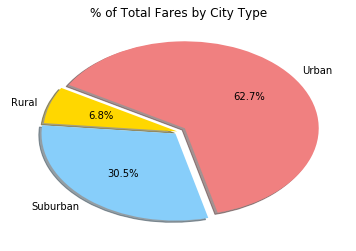

In [28]:
# Build Pie Chart with function

##### define a function to plot the draft pie chart:
def pie_plot(df):
    sizes = df["percentage"]
    labels = df["type"]
    return plt.pie(sizes, counterclock = False, labels = labels, explode = df["percentage"]/10, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)

##### call the function to plot the pie chart
pie_plot(fare_sum_df)

###### add other details to the pie chart
plt.title("% of Total Fares by City Type")
plt.savefig("Pyber_fare_perc.jpg")
plt.show()

In [ ]:
######################################################################################################################################
#
# Figure "% Total Fares by City Type" shows that the urban cities have the highest fares, while the rural cities have the lowest.
# Similarly, the total fares in suburban cities are in the middle of urban cities and rural cities
#
#######################################################################################################################################

## Total Rides by City Type

In [24]:
# Calculate Ride Percents

###### obtain the total rides for all the types
total_ride_count = combined_2_data["ride_id"].count()

###### find fare for each type
type_ride_count = type_2_grouped["ride_id"].count()

###### store the sum fare for each type in a DataFrame
ride_df = pd.DataFrame({"ride_count": type_ride_count})

###### store the fare percentage for each type in a DataFrame
ride_df["percentage"] = ride_df["ride_count"]/total_ride_count

ride_df = reorderDF(ride_df)
ride_df

,ride_count,percentage,type
0,1625,0.684211,Urban
1,625,0.263158,Suburban
2,125,0.052632,Rural


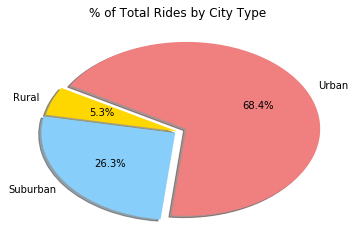

In [29]:
# Build Pie Chart with the defined function 
pie_plot(ride_df)

###### add other details to the pie chart
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_ride_perc.jpg")

# Show plot
plt.show()

In [ ]:
######################################################################################################################################
#
# Figure "% Total Rides by City Type" shows that the urban cities have the most rides, while the rural cities have the least.
# Similarly, the total rides in suburban cities are in the middle of urban cities and rural cities
#
#######################################################################################################################################

## Total Drivers by City Type

In [26]:
# Calculate Driver Percents

###### obtain the total rides for all the types
total_driver_count = combined_1_data["driver_count"].sum()

###### groups by using city type
type_1_grouped = combined_1_data.groupby(["type"])

###### find fare for each type
type_driver_count = type_1_grouped["driver_count"].sum()

###### store the sum fare for each type in a DataFrame
driver_df = pd.DataFrame({"driver_count": type_driver_count})

###### store the fare percentage for each type in a DataFrame
driver_df["percentage"] = driver_df["driver_count"]/total_driver_count

driver_df = reorderDF(driver_df)
driver_df

,driver_count,percentage,type
0,2405,0.808947,Urban
1,490,0.164817,Suburban
2,78,0.026236,Rural


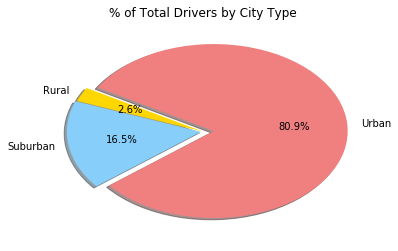

In [30]:
# Build Pie Chart with the defined function 
pie_plot(driver_df)

# add the title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_driver_perc.jpg")

# Show plot
plt.show()

In [ ]:
######################################################################################################################################
#
# Figure "% Total Drivers by City Type" shows that the urban cities have the most drivers, while the rural cities have the least.
# Similarly, the total drivers in suburban cities are in the middle of urban cities and rural cities
#
#######################################################################################################################################